In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as pylab
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
plt.grid(b=None)
font = 10
params = {'legend.fontsize': 20,
          'figure.figsize': (10, 7),
         'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':20,
         'ytick.labelsize':20
         }
pylab.rcParams.update(params)

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data = data[['Glucose','BMI','Outcome']]
col = ['Glucose','BMI']
g_drop = data[data.Glucose == 0].index
n_drop = data[data.BMI == 0].index
data.drop(index = g_drop,axis= 0, inplace = True)
data.drop(index = n_drop, axis = 0, inplace = True)
x_train,x_test,y_train,y_test = train_test_split(data[col],data['Outcome'], test_size = 0.2, random_state = 50)

In [4]:
y_test.value_counts()

0    90
1    61
Name: Outcome, dtype: int64

In [5]:
data['Outcome'].value_counts()

0    488
1    264
Name: Outcome, dtype: int64

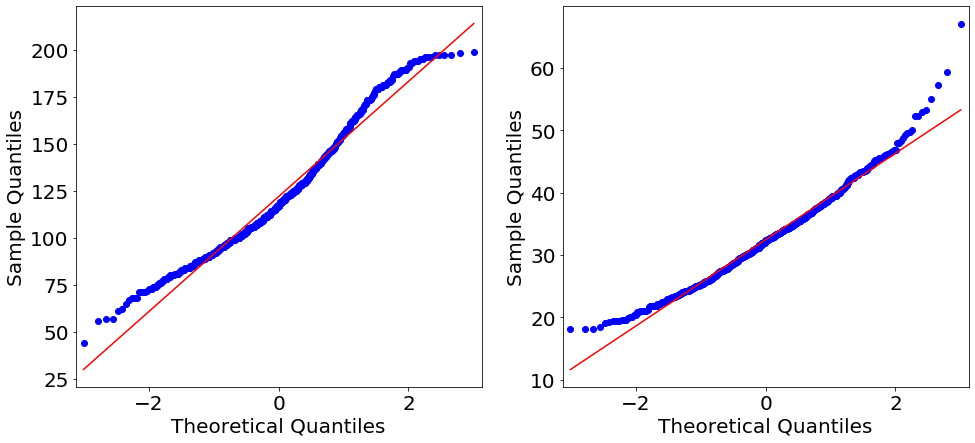

In [6]:
from statsmodels.graphics.gofplots import qqplot
f, ax = plt.subplots(1,2, figsize = (16,7))
qqplot(data['Glucose'],line = 's', ax = ax[0])
qqplot(data['BMI'],line = 's', ax = ax[1])
plt.show()

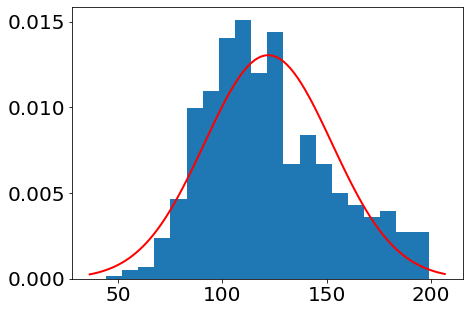

not normal


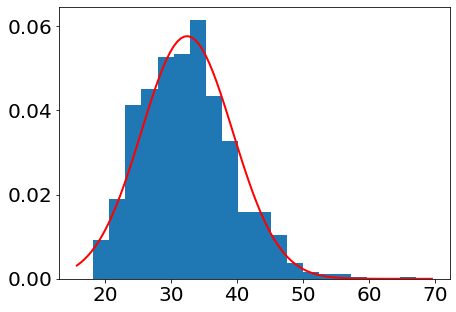

not normal


In [7]:
from scipy.stats import norm
from scipy.stats import normaltest

for i in range(0,2):
    plt.figure(figsize = (7,5))
    mu, std = norm.fit(data[col[i]])
    plt.hist(x = data[col[i]],bins = 20, density=True)
    xmin = min(data[col[i]])
    xmax = max(data[col[i]])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)
    plt.show()
    k2, p = normaltest(data[col[i]])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("not normal")
    else:
        print("normal")

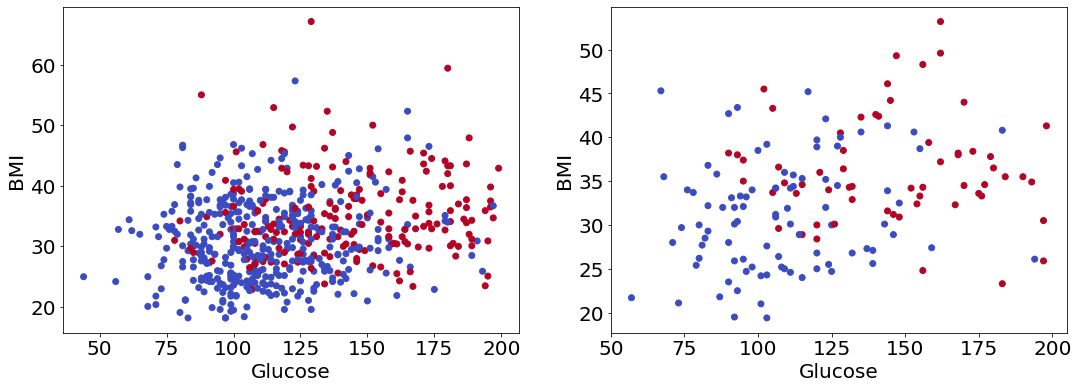

In [8]:
fig, ax = plt.subplots(1,2, figsize = (18,6))
ax[0].scatter(x = x_train['Glucose'], y = x_train['BMI'], c=y_train, cmap=plt.cm.coolwarm)
ax[1].scatter(x = x_test['Glucose'], y = x_test['BMI'], c=y_test, cmap=plt.cm.coolwarm)
ax[0].set_xlabel('Glucose')
ax[0].set_ylabel('BMI')
ax[1].set_xlabel('Glucose')
ax[1].set_ylabel('BMI')
fig.savefig('datadistribution.png',dpi = 300)

In [9]:
#f, ax = plt.subplots(1,2, figsize = (20,7))
#sns.scatterplot(data = data, x = 'Glucose', y = 'BMI', hue = "Outcome",ax = ax[0])
#sns.scatterplot(data = data, x = 'BMI',y = 'Pregnancies',hue = "Outcome", ax = ax[1])

FDA_accuracy:  0.7615894039735099
recall:  0.5573770491803278


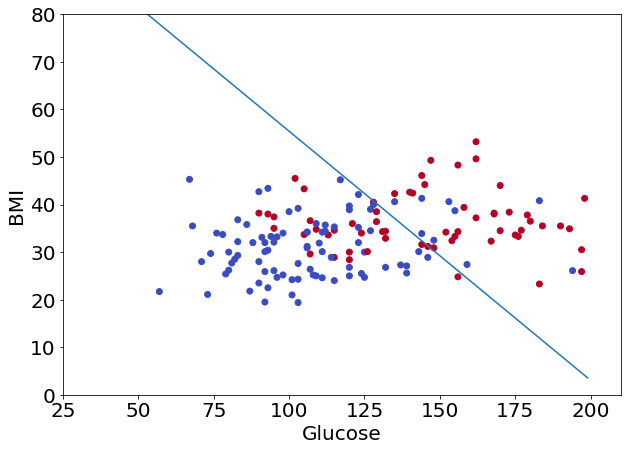

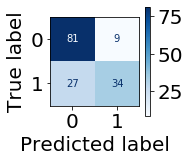

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(solver = 'lsqr')
clf.fit(x_train,y_train)

w = clf.coef_
inter = clf.intercept_
y_pre = clf.predict(x_test)
plt.figure(figsize = (10,7))
print('FDA_accuracy: ', accuracy_score(y_test,y_pre))
print('recall: ', recall_score(y_test,y_pre))
plt.scatter(x = x_test['Glucose'],y = x_test['BMI'], c=y_test, cmap=plt.cm.coolwarm)
x  = range(0,200)
y = -(inter+x*w[0][0])/w[0][1]
decision = pd.DataFrame([x,y])
decision = np.transpose(decision)
decision.columns = ['x','y']
sns.lineplot(x = 'x',y = 'y',data = decision)
plt.xlim([25,210])
plt.ylim([0,80])
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

f, ax = plt.subplots(figsize = (2,2))
ax.grid(False)
plot_confusion_matrix(clf ,x_test, y_test, cmap= plt.cm.Blues, ax = ax)
#ax.savefig('confusion.png',dpi = 200)

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True) #not same covariance
qda.fit(x_train,y_train)
y_pre_q = qda.predict(x_test)
print('qda accuracy: ',accuracy_score(y_test,y_pre_q))
print('recall: ', recall_score(y_test,y_pre_q))
confusion_matrix(y_test,y_pre_q)

qda accuracy:  0.7682119205298014
recall:  0.5737704918032787


array([[81,  9],
       [26, 35]])

In [10]:
qda.covariance_

[array([[610.44190727,  18.3064314 ],
        [ 18.3064314 ,  44.27870537]]), array([[879.64488124,  15.41966298],
        [ 15.41966298,  45.89091401]])]

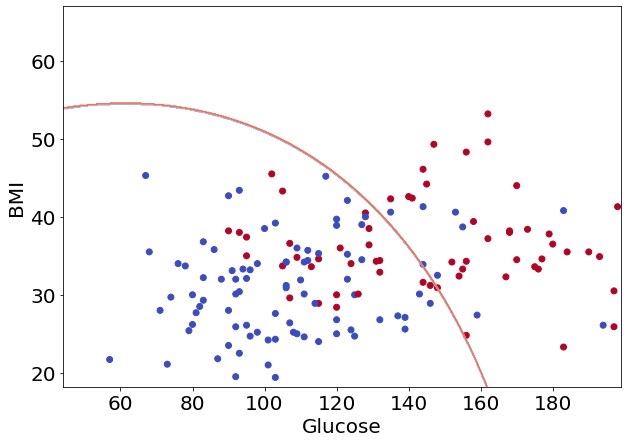

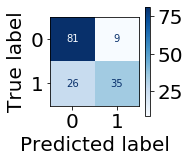

In [11]:
x_min = min(data.Glucose)
x_max = max(data.Glucose)
y_min = min(data.BMI)
y_max = max(data.BMI)
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (10,7))
plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_test['Glucose'], x_test['BMI'], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

f, ax = plt.subplots(figsize = (2,2))
ax.grid(False)
plot_confusion_matrix(qda ,x_test, y_test, cmap= plt.cm.Blues, ax = ax)
f.savefig('confusion.png',dpi = 200)

In [31]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(multi_class = 'ovr', class_weight='balanced')
lgr.fit(x_train,y_train)
y_pre = lgr.predict(x_test)
print('logistic regression accuracy: ',accuracy_score(y_test,y_pre))
print('recall: ', recall_score(y_test,y_pre))


logistic regression accuracy:  0.7748344370860927
recall:  0.7704918032786885


In [34]:
np.bincount(y_train)

array([398, 203])

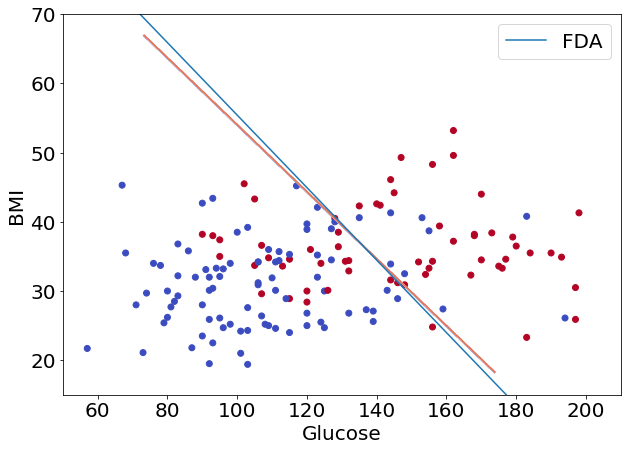

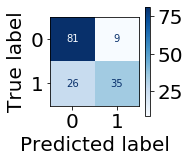

In [28]:
Z = lgr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (10,7))
plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
#plt.legend('logistic regression')
plt.scatter(x_test['Glucose'], x_test['BMI'], c=y_test, cmap=plt.cm.coolwarm)
a = sns.lineplot(x = 'x',y = 'y',data = decision)
plt.ylim([15,70])
plt.xlim([50,210])
plt.xlabel('Glucose')
plt.ylabel('BMI')
a.legend(['FDA'])
#plt.legend(['FDA','0','1','logistic regression'])
plt.show()
f, ax = plt.subplots(figsize = (2,2))
ax.grid(False)
plot_confusion_matrix(lgr ,x_test, y_test, cmap= plt.cm.Blues, ax = ax)
f.savefig('confusion.png',dpi = 200)

In [16]:
#with radial basis kernel logistic regression
from sklearn.kernel_approximation import RBFSampler
rbf_feature = RBFSampler(gamma=0.01, random_state=4,n_components = 2)
x_rbf_train = rbf_feature.fit_transform(x_train,y_train)
x_rbf_test = rbf_feature.fit_transform(x_test,y_test)

In [17]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(multi_class = 'ovr', class_weight={1:2})
lgr.fit(x_rbf_train,y_train)
y_pre = lgr.predict(x_rbf_test)
print('logistic regression accuracy: ',accuracy_score(y_test,y_pre))

logistic regression accuracy:  0.5629139072847682


In [18]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(multi_class = 'ovr', class_weight={1:2})
lgr.fit(x_rbf_train,y_train)
y_pre = lgr.predict(x_rbf_test)
x_rbf_test.shape

(151, 2)

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svm = SVC(kernel = 'rbf',gamma = 0.01,C = 1.8,class_weight = 'balanced')
svm.fit(x_train,y_train)
y_pre =svm.predict(x_test)
print('accuracy: ',accuracy_score(y_test,y_pre))
print('recall: ', recall_score(y_test,y_pre))


accuracy:  0.8013245033112583
recall:  0.8032786885245902


In [62]:
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


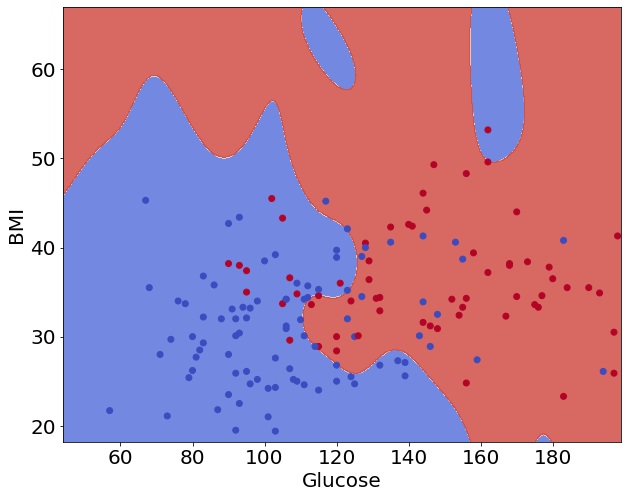

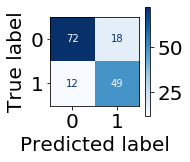

In [63]:
f, ax = plt.subplots(figsize = (10,8))
#temp = ax.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_test['Glucose'], x_test['BMI'], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Glucose')
plt.ylabel('BMI')

f, ax = plt.subplots(figsize = (2,2))
ax.grid(False)
plot_confusion_matrix(svm ,x_test, y_test, cmap= plt.cm.Blues, ax = ax)
f.savefig('confusion.png',dpi = 200)

In [38]:
#Gaussian process wit rbf kernel
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(x_train, y_train)
y_pre = gpc.predict(x_test)
print('gaussian process accuracy: ',accuracy_score(y_test,y_pre))
print('recall: ', recall_score(y_test,y_pre))

gaussian process accuracy:  0.7682119205298014
recall:  0.5737704918032787


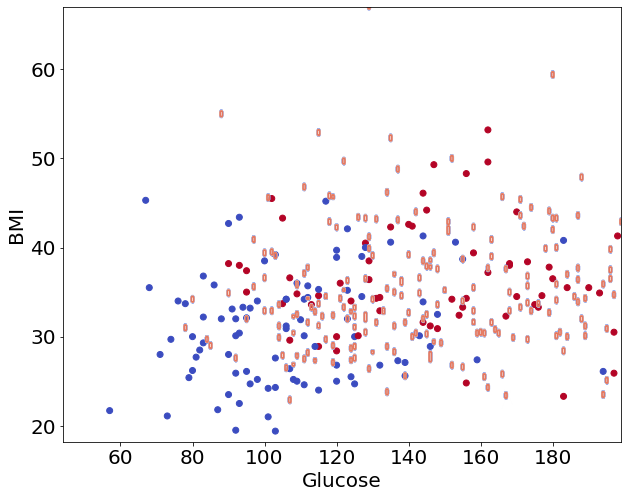

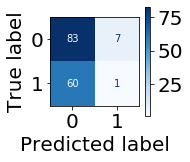

In [37]:
Z = gpc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (10,8))
plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_test['Glucose'], x_test['BMI'], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Glucose')
plt.ylabel('BMI')

f, ax = plt.subplots(figsize = (2,2))
ax.grid(False)
plot_confusion_matrix(gpc ,x_test, y_test, cmap= plt.cm.Blues, ax = ax)
f.savefig('confusion.png',dpi = 200)

gaussian process accuracy:  0.7682119205298014
recall:  0.5737704918032787


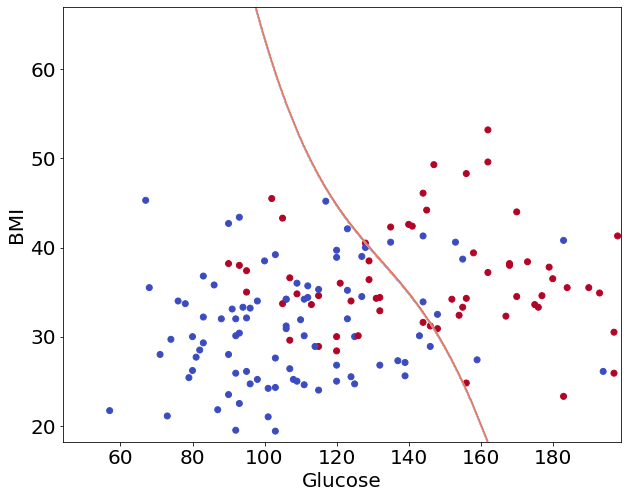

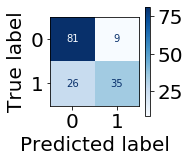

In [25]:
from sklearn.gaussian_process.kernels import RationalQuadratic
kernel = RationalQuadratic(length_scale=1.0, alpha=3)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(x_train, y_train)
y_pre = gpc.predict(x_test)
print('gaussian process accuracy: ',accuracy_score(y_test,y_pre))
print('recall: ', recall_score(y_test,y_pre))
Z = gpc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize = (10,8))
plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_test['Glucose'], x_test['BMI'], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Glucose')
plt.ylabel('BMI')

f, ax = plt.subplots(figsize = (2,2))
ax.grid(False)
plot_confusion_matrix(gpc ,x_test, y_test, cmap= plt.cm.Blues, ax = ax)
f.savefig('confusion.png',dpi = 200)

In [27]:
from sklearn.mixture import BayesianGaussianMixture
gm = BayesianGaussianMixture(n_components = 2)
gm.fit(x_train,y_train)
y_pre = gm.predict(x_test)

print('mixture gaussian accuracy: ',accuracy_score(y_test,y_pre))
print('recall: ', recall_score(y_test,y_pre))

print('mean: ',gm.means_)
gm.covariances_

mixture gaussian accuracy:  0.7748344370860927
recall:  0.639344262295082
mean:  [[108.19405662  30.32082624]
 [149.95411056  36.32170418]]


array([[[396.23064554,   5.73108799],
        [  5.73108799,  33.21360812]],

       [[778.09942308, -39.44845025],
        [-39.44845025,  56.23860035]]])

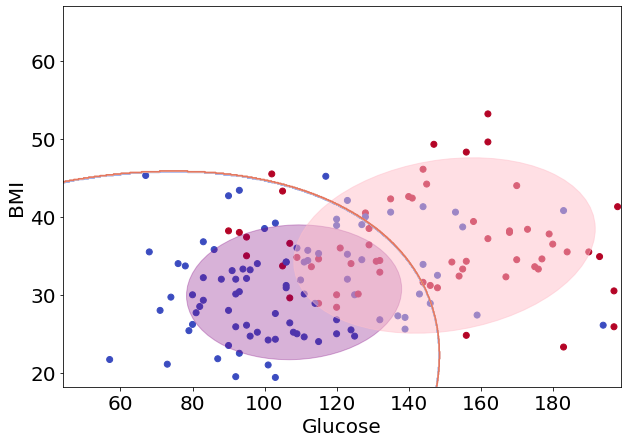

array([[78, 12],
       [22, 39]])

In [31]:
from matplotlib.patches import Ellipse

Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize = (10,7))
ax.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x_test['Glucose'], x_test['BMI'], c=y_test, cmap=plt.cm.coolwarm)
j = 1.5
cov = gm.covariances_[0]
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ell_1 = Ellipse(xy=(gm.means_[0][0], gm.means_[0][1]),
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])),color = 'purple', alpha = 0.3)
ax.add_artist(ell_1)
cov = gm.covariances_[1]
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ell_2 = Ellipse(xy=(gm.means_[1][0], gm.means_[1][1]),
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])),color = 'pink', alpha = 0.5)

ax.add_artist(ell_2)
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
plt.show()

confusion_matrix(y_test,y_pre)



Text(0, 0.5, 'BMI')

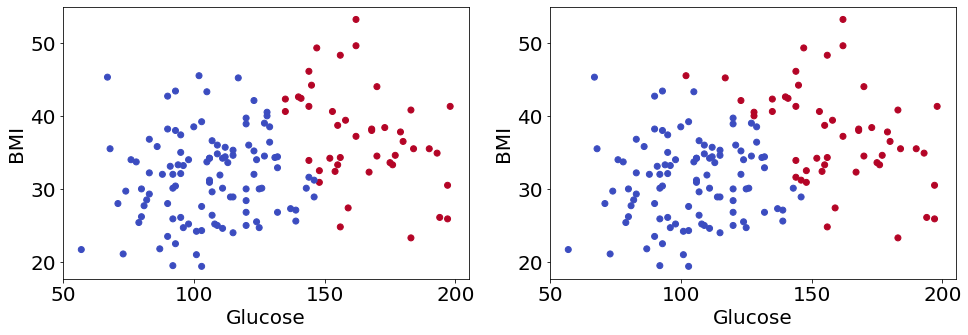

In [36]:
f, ax = plt.subplots(1,2, figsize = (16,5))
ax[1].scatter(x_test['Glucose'], x_test['BMI'], c=y_pre, cmap=plt.cm.coolwarm)
ax[0].scatter(x_test['Glucose'], x_test['BMI'], c=y_pre_q, cmap=plt.cm.coolwarm)
ax[1].set_xlabel('Glucose')
ax[0].set_xlabel('Glucose')
ax[1].set_ylabel('BMI')
ax[0].set_ylabel('BMI')

In [ ]:
plt.scatter(x_test['Glucose'], x_test['BMI'], c=y_pre, cmap=plt.cm.coolwarm)

In [ ]:
print(np.sqrt(gm.covariances_[0][0,0]*gm.covariances_[0][1,1]))
print(np.sqrt(gm.covariances_[1][0,0]*gm.covariances_[1][1,1]))

# Classification

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = 'random',n_clusters = 2,max_iter=300,random_state = 20)
kmeans.fit(x_train)

In [ ]:
C = kmeans.cluster_centers_
print(C)
print(kmeans.n_iter_)

In [ ]:
#show process
f, ax = plt.subplots(2,2,figsize = (18,15))
for i in range(1,5):
    kmeans = KMeans(init = 'random',n_clusters = 2,max_iter=i,random_state = 10)
    kmeans.fit(x_train)
    
    ax[int((i-1)/2),(i-1)%2].scatter(x_train['Glucose'], x_train['BMI'], c=kmeans.labels_, cmap=plt.cm.coolwarm)
    ax[int((i-1)/2),(i-1)%2].scatter(C[:,0],C[:,1], color = 'orange')
    
f.savefig('clustering.png',dpi = 300)

In [ ]:
y_pre = kmeans.predict(x_test)
accuracy = accuracy_score(y_test,y_pre)
if accuracy < 0.5:
    accuracy = 1-accuracy
print('kmeans accuracy: ',accuracy)
print('recall: ', recall_score(y_test,y_pre))
confusion_matrix(y_test,y_pre)

In [ ]:
f, ax = plt.subplots(3,3,figsize = (18,18))
for i in range(13,22):
    kmeans = KMeans(init = 'random',n_clusters = 8,max_iter=i,random_state = 10)
    kmeans.fit(x_train)
    
    ax[int((i-13)/3),(i-13)%3].scatter(x_train['Glucose'], x_train['BMI'], c=kmeans.labels_, cmap=plt.cm.coolwarm)
    ax[int((i-13)/3),(i-13)%3].scatter(C[:,0],C[:,1], color = 'orange')

In [ ]:
plt.figure(figsize = (15,8))
plt.scatter(x_train['Glucose'], x_train['BMI'], c=y_train, cmap=plt.cm.coolwarm)

# Comparison each model 6

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(LinearDiscriminantAnalysis(solver = 'lsqr'))
classifiers.append(QuadraticDiscriminantAnalysis(store_covariance=True))
classifiers.append(LogisticRegression(multi_class = 'ovr', class_weight={1:2}))
classifiers.append(SVC(kernel = 'rbf',gamma = 0.01,C = 1.5,class_weight = 'balanced'))
classifiers.append(GaussianProcessClassifier(kernel=RBF(1.0),random_state=0).fit(x_train, y_train))
classifiers.append(GaussianProcessClassifier(kernel=RationalQuadratic(length_scale=1.0, alpha=3),random_state=0).fit(x_train, y_train))
classifiers.append(BayesianGaussianMixture(n_components = 2))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["FDA","QDA_diff_cov","logistic",
"svc","gaussian_rbf","gaussian_quadratic","mixed gaussian"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(LinearDiscriminantAnalysis(solver = 'lsqr'))
classifiers.append(QuadraticDiscriminantAnalysis(store_covariance=True))
classifiers.append(LogisticRegression(multi_class = 'ovr', class_weight={1:2}))
classifiers.append(SVC(kernel = 'rbf',gamma = 0.01,C = 1.5,class_weight = 'balanced'))
classifiers.append(GaussianProcessClassifier(kernel=RBF(1.0),random_state=0).fit(x_train, y_train))
classifiers.append(GaussianProcessClassifier(kernel=RationalQuadratic(length_scale=1.0, alpha=3),random_state=0).fit(x_train, y_train))
classifiers.append(BayesianGaussianMixture(n_components = 2))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "recall", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["FDA","QDA_diff_cov","logistic",
"svc","gaussian_rbf","gaussian_quadratic","mixed gaussian"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Recall")
g = g.set_title("Cross validation scores")